In [1]:
# Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import joblib

In [2]:
# Read the CSV
df = pd.read_csv("../cleaned_data/cleaned_house_crime_school.csv")
df

,Suburb,Address,Rooms,Type,Price,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,CrimeRate,NearbySchools
0,Abbotsford,85 Turner St,2,h,1480000.0,2016-12-03,2.5,3067,1,1,202,0,0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019,157,2
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,2016-02-04,2.5,3067,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019,157,2
2,Abbotsford,5 Charles St,3,h,1465000.0,2017-03-04,2.5,3067,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019,157,2
3,Abbotsford,40 Federation La,3,h,850000.0,2017-03-04,2.5,3067,2,1,94,0,0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019,157,2
4,Abbotsford,55a Park St,4,h,1600000.0,2016-06-04,2.5,3067,1,2,120,142,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019,157,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16035,Yarraville,78 Bayview Rd,3,h,1101000.0,2018-02-24,6.3,3013,1,0,288,0,0,Maribyrnong City Council,-37.8110,144.8852,Western Metropolitan,6543,136,5
16036,Yarraville,13 Burns St,4,h,1480000.0,2018-02-24,6.3,3013,1,3,593,0,0,Maribyrnong City Council,-37.8105,144.8847,Western Metropolitan,6543,136,5
16037,Yarraville,29A Murray St,2,h,888000.0,2018-02-24,6.3,3013,2,1,98,104,2018,Maribyrnong City Council,-37.8155,144.8883,Western Metropolitan,6543,136,5
16038,Yarraville,147A Severn St,2,t,705000.0,2018-02-24,6.3,3013,1,2,220,120,2000,Maribyrnong City Council,-37.8229,144.8786,Western Metropolitan,6543,136,5


# Select features (columns)

In [3]:
# Set features to be used as X values.
X = df.drop(["Price",
             "Suburb",
             "Date",
             "Address",
             "Type",
             "Postcode",
             "CouncilArea",
             "Lattitude",
             "Longtitude",
             "Regionname",
             "Distance",
             "YearBuilt",
             "CrimeRate"], axis = "columns")
y = df["Price"]
print(X.shape, y.shape)

(16040, 7) (16040,)


In [4]:
X

,Rooms,Bathroom,Car,Landsize,BuildingArea,Propertycount,NearbySchools
0,2,1,1,202,0,4019,2
1,2,1,0,156,79,4019,2
2,3,2,0,134,150,4019,2
3,3,2,1,94,0,4019,2
4,4,1,2,120,142,4019,2
...,...,...,...,...,...,...,...
16035,3,1,0,288,0,6543,5
16036,4,1,3,593,0,6543,5
16037,2,2,1,98,104,6543,5
16038,2,1,2,220,120,6543,5


In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\franc\anaconda3\envs\pythonData\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


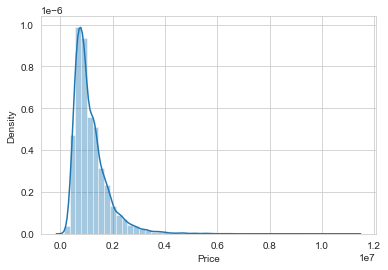

C:\Users\franc\anaconda3\envs\pythonData\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


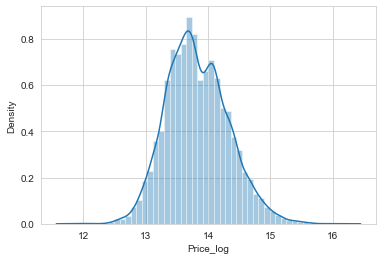

In [6]:
x = df.Price
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

df['Price_log'] = np.log(df.Price)
x = df.Price_log
sns.distplot(x)
plt.show()


In [7]:
# GET housing stats
total_houses = len(df)
max_value = df["Price"].describe()["max"]
min_value = df["Price"].describe()["min"]
print(f"Total houses: {total_houses}")
print(f"Highest price: {max_value}")
print(f"Lowest price: {min_value}")

Total houses: 16040
Highest price: 11200000.0
Lowest price: 131000.0


# Split the data into test and train data using `train_test_split` with test size of 33%

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.33)
X_train

,Rooms,Bathroom,Car,Landsize,BuildingArea,Propertycount,NearbySchools
6367,3,2,2,226,140,3593,7
14911,5,2,3,635,0,3619,12
1597,3,1,2,699,0,5051,4
10351,3,2,1,1007,250,2985,13
6765,3,2,2,257,120,21650,14
...,...,...,...,...,...,...,...
13418,3,2,4,560,154,7630,8
5390,3,1,1,202,0,6543,5
860,2,1,2,750,0,10969,7
15795,5,2,2,710,0,2671,3


# Pre-processing

In [9]:
# Scale the data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model using RandomForestRegression

In [10]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train_scaled, y_train)

training_score = regressor.score(X_train_scaled, y_train)
base_accuracy = regressor.score(X_test_scaled, y_test)

print(f"RandomForestregressor training Data Score: {training_score}")
print(f"RandomForestregressor testing Data Score: {base_accuracy}")

RandomForestregressor training Data Score: 0.9469086664233286
RandomForestregressor testing Data Score: 0.6280722899152826


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

# Parameters: n_estimators=600, max_features= Auto, max_depth= None

In [11]:
# Create the GridSearchCV model
param_grid = {"n_estimators": [800, 1600],
              "max_features": ["auto", "sqrt", "log2"],
              "max_depth": [17, 18, None]}

grid = GridSearchCV(regressor, param_grid, error_score = "raise", verbose = 3, cv = 5, n_jobs = -1)

In [12]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [17, 18, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [800, 1600]},
             verbose=3)

In [13]:
print(f"Best grid params: {grid.best_params_}")
print(f"Best grid score: {grid.best_score_}")

Best grid params: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 1600}
Best grid score: 0.6124444977448444


# Train Tuned Model

In [14]:
# Tuned parameters
max_features = grid.best_params_["max_features"]
n_estimators = grid.best_params_["n_estimators"]
max_depth = grid.best_params_["max_depth"]

# Tuned model
tuned_model = RandomForestRegressor(max_features = max_features, 
                                     n_estimators = n_estimators,
                                     max_depth = max_depth,
                                     random_state = 42)
tuned_model.fit(X_train, y_train)

tuned_model_score = tuned_model.score(X_train, y_train)
tuned_accuracy = tuned_model.score(X_test, y_test)

print(f"Training Data Score: {tuned_model_score}")
print(f"Testing Data Score: {tuned_accuracy}")

Training Data Score: 0.9491172155803949
Testing Data Score: 0.6345931075868654


In [15]:
# Make predictions with the hypertuned model
predictions = tuned_model.predict(X_test)
classifications = y_test.unique().tolist()

prediction_actual = {"Actual": y_test,
                     "Prediction": predictions}

prediction_df = pd.DataFrame(prediction_actual)
prediction_df = prediction_df.set_index("Actual").reset_index()
prediction_df

,Actual,Prediction
0,765000.0,8.044208e+05
1,1000000.0,9.161516e+05
2,1025000.0,9.254830e+05
3,812000.0,1.027721e+06
4,725000.0,7.520225e+05
...,...,...
5289,682000.0,6.345903e+05
5290,1200000.0,2.568789e+06
5291,1377000.0,1.318831e+06
5292,1126000.0,9.479054e+05


In [16]:
evaluations = {"": ["Base Model", "Tuned Model"],
               "Accuracy": [f"%s" % round(base_accuracy, 3), f"%s" % round(tuned_accuracy, 3)]}

evaluations_df = pd.DataFrame(evaluations)
evaluations_df = evaluations_df.set_index("")

evaluations_df.to_csv("../evaluations/random_forest_eval.csv")
evaluations_df

,Accuracy
,
Base Model,0.628
Tuned Model,0.635


# Save the model

In [17]:
filename = "../models/random_forest.sav"
joblib.dump(tuned_model, filename)

['../models/random_forest.sav']